In [37]:
import pandas as pd


df = pd.read_csv("C:/projet_mobility_urbaine/AI_model_urban_mobility/table_final_202504261722.csv", parse_dates=["horodatage"])


C:\Users\lisas\AppData\Local\Temp\ipykernel_2904\898804058.py:4: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/projet_mobility_urbaine/AI_model_urban_mobility/table_final_202504261722.csv", parse_dates=["horodatage"])


In [38]:
df.head()

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,...,epsg_reg,etat_indice,geom_type,geom_coordinates,geo_point_2d_lon,geo_point_2d_lat,has_event_near_troncon,heure,pluie,is_weekend
0,100063-20250225T064700,100063,60,224,0.8,3,Grootaers,fluide,43,19,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,True,False
1,5285-20250225T064700,5285,120,140,1.6,3,Veil P2,fluide,29,17,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,True,False
2,44-20250225T064700,44,180,283,2.9,3,Anglais P4,fluide,80,13,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,True,False
3,5223-20250225T064700,5223,60,449,0.8,3,Coubertin P1,fluide,61,26,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,True,False
4,138-20250225T064700,138,420,188,7.9,3,Blanc I,fluide,39,17,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,True,False


In [39]:
# Filter sur un tronçon : choix "Lauriol I4"
troncon = "Lauriol I4"
df_troncon = df[df["nom_du_troncon"] == troncon].copy()
df_troncon.head()

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,...,epsg_reg,etat_indice,geom_type,geom_coordinates,geo_point_2d_lon,geo_point_2d_lat,has_event_near_troncon,heure,pluie,is_weekend
161,497-20250225T064700,497,120,224,2.9,3,Lauriol I4,fluide,48,17,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,6,True,False
603,497-20250225T072200,497,360,224,5.4,3,Lauriol I4,fluide,44,18,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,7,True,False
1049,497-20250225T074200,497,660,224,10.8,3,Lauriol I4,fluide,46,18,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,7,True,False
2132,497-20250225T075200,497,600,224,8.3,3,Lauriol I4,fluide,46,18,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,7,True,False
2727,497-20250225T081800,497,240,224,26.2,4,Lauriol I4,dense,178,5,...,2154,Consolidée,Feature,"[[[[-1.532422818, 47.295023199], [-1.527218409...",-1.548206,47.232044,False,8,True,False


In [40]:
# Tri par temps
df_troncon.sort_values("horodatage", inplace=True)
df_troncon.set_index("horodatage", inplace=True)

Visualiser la série du débit

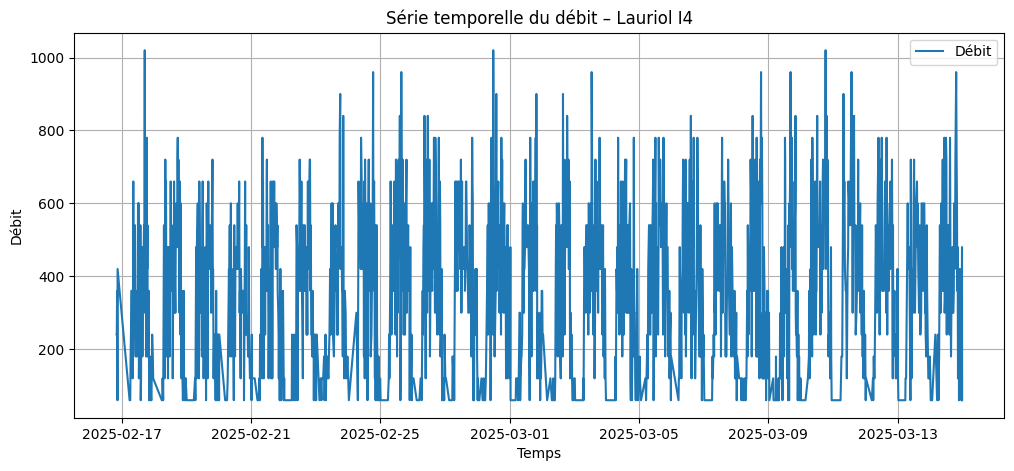

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_troncon["debit"], label="Débit")
plt.title(f"Série temporelle du débit – {troncon}")
plt.xlabel("Temps")
plt.ylabel("Débit")
plt.grid(True)
plt.legend()
plt.show()


Axe X → Le temps, de 2025-02-16 jusqu'à 2025-03-14.

Axe Y → Le débit

### Probable saisonnalité courte : 
on peut suspecter qu'il existe des cycles journaliers ou hebdomadaires

### Pas de tendance très claire
Globalement, le niveau de débit ne monte pas ni ne descend sur la période : pas de vraie "tendance" forte. (Pas de croissance ou décroissance visible sur plusieurs semaines.)

### Un bruit important
Beaucoup de "petits pics" très serrés ➔ ce bruit pourrait rendre la prédiction plus difficile sans un peu de lissage ou de résampling.

Analyser les composantes temporelles


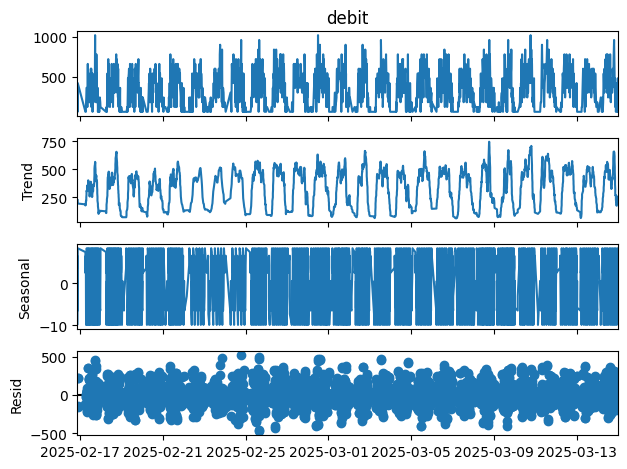

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_troncon["debit"], model='additive', period=12)  # 12 si 5min x 12 = 1h
result.plot()
plt.show()




Tendance :            	 Présente (cycle court)

Saisonnalité :	         Présente mais faible (plutôt quotidienne)

Résidus (bruit)	:          Fort, donc difficile de prédire à court terme sans modèles puissants

Regarder l'autocorrélation

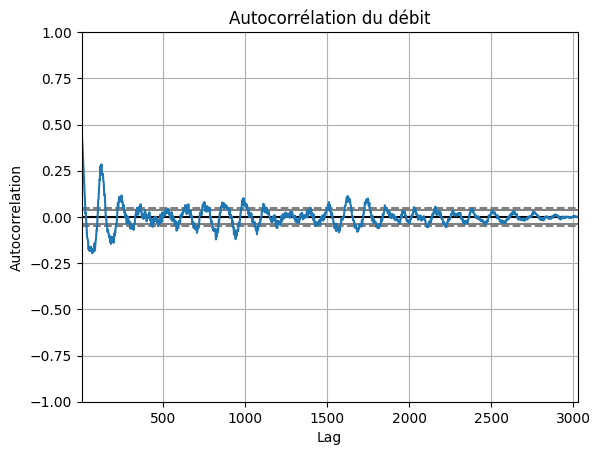

In [43]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_troncon["debit"])
plt.title("Autocorrélation du débit")
plt.show()


 L'axe des abscisses (X) ➔ représente le décalage (lag) : 1 lag = 5 min

 L'axe des ordonnées (Y) ➔ représente la force de la corrélation (entre -1 et +1).

Forte corrélation à court terme (0-200 lags)	Très bon signe pour la prédiction à court terme

Faible corrélation après 200-300 lags	Moins utile de regarder trop loin dans le passé

 

Vérifier la stationnarité

In [44]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_troncon["debit"].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("✅ Série stationnaire")
else:
    print("❌ Série non stationnaire")


ADF Statistic: -9.096502111728471
p-value: 3.702719052915549e-15
✅ Série stationnaire


✅ Série stationnaire

Stationnarité = caractéristiques statistiques (moyenne, variance) stables dans le temps ➔ nécessaire pour des modèles comme ARIMA.

# Appliquer un LSTM simple pour prédire le débit futur 

### Imports

In [45]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


### Préparation des données

In [46]:


# Normaliser les données entre 0 et 1
scaler = MinMaxScaler()
debit_scaled = scaler.fit_transform(df_troncon[['debit']])

# Créer les séquences pour LSTM
def create_sequences(data, time_steps=3):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 3  # tu peux tester avec 5, 10, etc.
X, y = create_sequences(debit_scaled, time_steps)

# Reshape pour LSTM [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


Séparer en Train et Test 

In [47]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


### Construire le modèle 

In [48]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


c:\projet_mobility_urbaine\AI_model_urban_mobility\urban_mobility_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Entrainer le modèle

In [49]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1060 - val_loss: 0.0397
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0374 - val_loss: 0.0341
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0351 - val_loss: 0.0318
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0300 - val_loss: 0.0305
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0296 - val_loss: 0.0295
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0313 - val_loss: 0.0292
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0300 - val_loss: 0.0283
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284 - val_loss: 0.0275
Epoch 9/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0291 - val_loss: 0.0268
Epoch 10/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257 - val_loss: 0.0263
Epoch 11/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0267 - val_loss: 0.0255
Epoch 12/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0252 - val_lo

Prédire et visualier

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


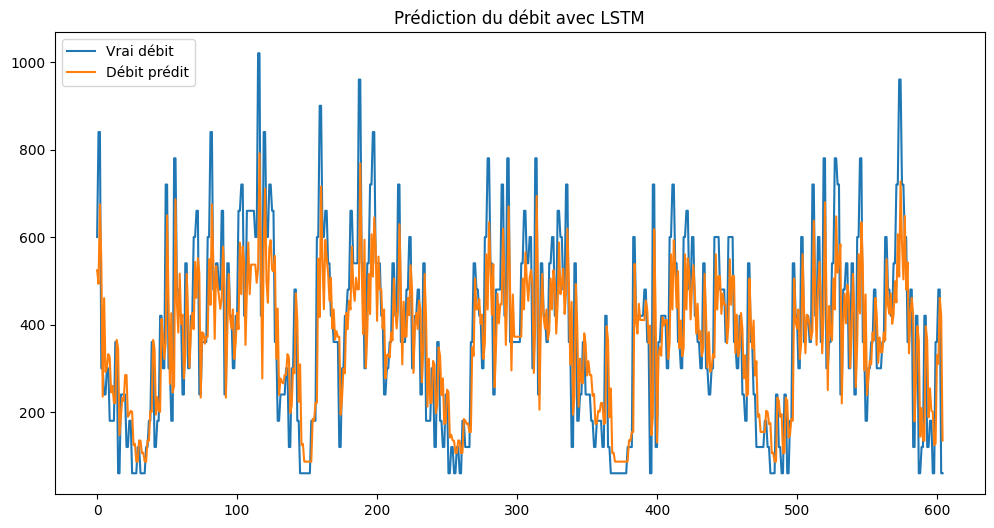

In [50]:
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_true_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

#Visualisation
plt.figure(figsize=(12, 6))
plt.plot(y_true_rescaled, label='Vrai débit')
plt.plot(y_pred_rescaled, label='Débit prédit')
plt.legend()
plt.title('Prédiction du débit avec LSTM')
plt.show()


Le modèle a capté l’ordre de grandeur du débit :

→ Les prédictions sont dans la bonne fourchette (pas complètement décalées).

✅ Le modèle suit vaguement la dynamique (montées/descendes rapides).

Resampler la série à 15 minutes

In [51]:
import pandas as pd

# S'assurer que l'index est bien du type datetime
df_troncon.index = pd.to_datetime(df_troncon.index)

# Resample toutes les 15 minutes, calculer la moyenne s'il y a plusieurs valeurs
df_resampled = df_troncon[['debit']].resample('15min').mean()

# Interpoler les éventuels trous (méthode linéaire)
df_resampled = df_resampled.interpolate(method='linear')

# Vérifier rapidement
print(df_resampled.head())


                          debit
horodatage                     
2025-02-16 20:15:00  240.000000
2025-02-16 20:30:00  360.000000
2025-02-16 20:45:00   60.000000
2025-02-16 21:00:00  420.000000
2025-02-16 21:15:00  409.714286


In [52]:
n_nan = df_resampled['debit'].isna().sum()

Vérification avec un graphique

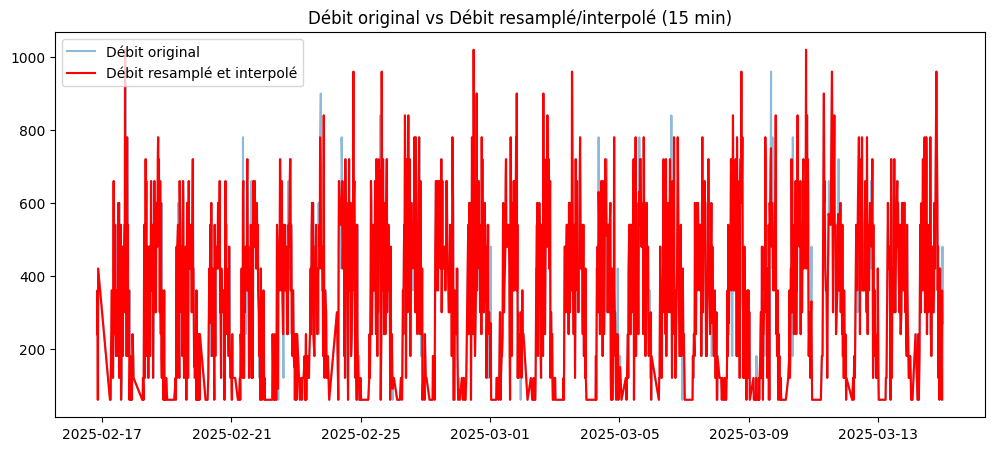

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_troncon['debit'], label='Débit original', alpha=0.5)
plt.plot(df_resampled['debit'], label='Débit resamplé et interpolé', color='red')
plt.legend()
plt.title("Débit original vs Débit resamplé/interpolé (15 min)")
plt.show()


In [54]:

# df_resampled contient une colonne 'debit' toutes les 15 minutes, interpolée.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense





In [55]:
# Normalisation
scaler = MinMaxScaler()
debit_scaled = scaler.fit_transform(df_resampled)

In [56]:
# Création des séquences temporelles
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 5  # On utilise 5 pas pour prédire

X, y = create_sequences(debit_scaled, time_steps)


In [57]:
# Séparation Train/Test
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Adapter la forme pour LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [58]:
# Construction du modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')




c:\projet_mobility_urbaine\AI_model_urban_mobility\urban_mobility_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
# Entraînement
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Prédiction
y_pred = model.predict(X_test)

# Revenir à l’échelle réelle
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))



Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0640 - val_loss: 0.0262
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - val_loss: 0.0239
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0235
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0233 - val_loss: 0.0231
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0230
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - val_loss: 0.0227
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0222 - val_loss: 0.0225
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - val_loss: 0.0224
Epoch 9/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0214 - val_loss: 0.0223
Epoch 10/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - val_loss: 0.0220
Epoch 11/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0230 - val_loss: 0.0218
Epoch 12/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - val_l

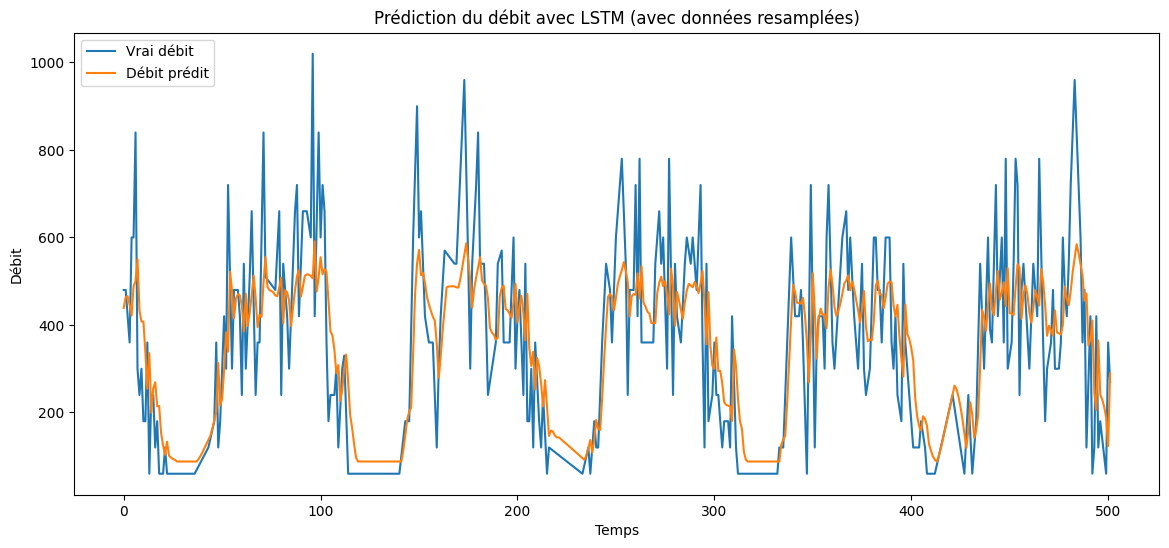

In [60]:
# Visualisation
plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled, label='Vrai débit')
plt.plot(y_pred_rescaled, label='Débit prédit')
plt.title('Prédiction du débit avec LSTM (avec données resamplées)')
plt.xlabel('Temps')
plt.ylabel('Débit')
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error

# 1. MAE
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
print(f"MAE: {mae:.2f}")

# 2. MAPE (gestion du cas y_true = 0)
epsilon = 1e-10  # pour éviter division par zéro
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / np.maximum(np.abs(y_test_rescaled), epsilon))) * 100
print(f"MAPE: {mape:.2f}%")


MAE: 99.50
MAPE: 44.74%
